# Activity 1:

Create the Neural Network, with below structure using the same dataset.
- 15 Neurons with 'relu' activation
- 25 Neurons with 'relu' activation
- 25 Neurons with 'relu' activation
- 10 Neurons with 'softmax' activation

For the Compile Method use the below settings:

- optimizer = 'Adam'
- loss = 'sparse_categorical_crossentropy'
- metrics = ['accuracy']

In [1]:
import tensorflow as tf
#tensors

# MNIST Dataset

In [2]:
from tensorflow.keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

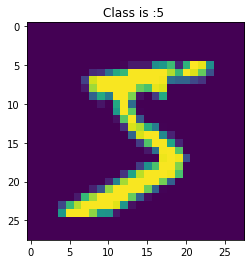

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.title(f"Class is :{y_train[0]} ")
plt.show()

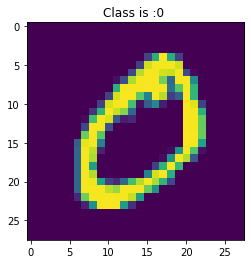

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])
plt.title(f"Class is :{y_train[1]} ")
plt.show()

In [5]:
# Explore
import numpy as np
np.max(X_train)

255

In [6]:
np.min(X_train)

0

In [7]:
# Normalize the data

X_train = X_train/255.0
X_test = X_test/255.0
np.max(X_train), np.min(X_train)

(1.0, 0.0)

In [8]:
# Various Layers in tf
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras import Sequential

In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))  # Convert the multi-dimension input into a single dim vector
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=25,activation='relu'))
model.add(Dense(units=25,activation='relu'))
# Multi class classification --> output layer activation = softmax
model.add(Dense(units=10,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 15)                11775     
                                                                 
 dense_1 (Dense)             (None, 25)                400       
                                                                 
 dense_2 (Dense)             (None, 25)                650       
                                                                 
 dense_3 (Dense)             (None, 10)                260       
                                                                 
Total params: 13,085
Trainable params: 13,085
Non-trainable params: 0
_________________________________________________________________


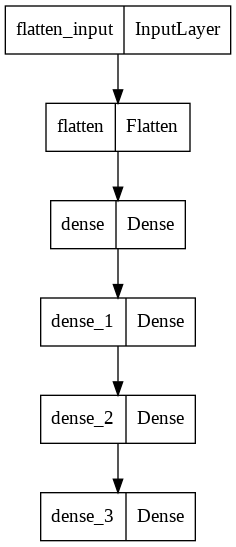

In [11]:
tf.keras.utils.plot_model(model)

# Optimizer
https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

rmsprop / adam

In [12]:
model.compile(optimizer= 'Adam', 
              loss = 'sparse_categorical_crossentropy', # Multi class classification
              metrics =['accuracy'] )

In [13]:
history = model.fit(X_train,y_train,epochs=25, batch_size=32)

Epoch 1/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4246 - accuracy: 0.8746
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2279 - accuracy: 0.9320
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1916 - accuracy: 0.9429
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1665 - accuracy: 0.9495
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1524 - accuracy: 0.9542
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1401 - accuracy: 0.9578
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1328 - accuracy: 0.9594
Epoch 8/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1246 - accuracy: 0.9625
Epoch 9/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1211 - accuracy: 0.9627
Epoch 10/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.114

In [14]:
h = history.history

In [15]:
h.keys()

dict_keys(['loss', 'accuracy'])

In [17]:
import matplotlib.pyplot as plt


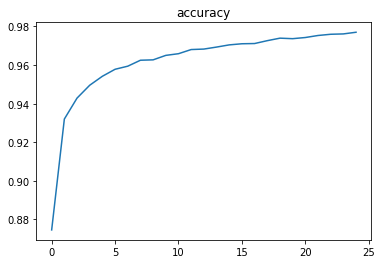

In [18]:
plt.plot(h['accuracy'])
plt.title("accuracy")
plt.show()

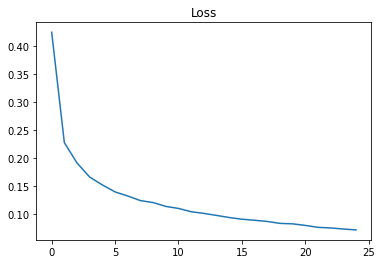

In [19]:
plt.plot(h['loss'])
plt.title("Loss")
plt.show()

In [20]:
# Prediction
y_pred = model.predict(X_test)
y_pred

array([[1.3012780e-04, 1.8977812e-11, 1.0554245e-07, ..., 9.9928421e-01,
        1.3118216e-06, 4.3865052e-04],
       [4.7134525e-11, 3.0154510e-05, 9.9994445e-01, ..., 2.2431208e-05,
        1.1806159e-06, 1.5145510e-11],
       [2.1725137e-07, 9.9898583e-01, 1.6044693e-05, ..., 2.5504426e-04,
        3.6174690e-05, 8.5772881e-05],
       ...,
       [9.9623304e-16, 3.3366458e-08, 4.1404550e-11, ..., 1.2887981e-08,
        4.0763001e-12, 1.2730450e-06],
       [7.8307812e-11, 2.3938240e-09, 3.2761080e-10, ..., 5.2663329e-10,
        2.0608935e-05, 1.6193298e-11],
       [5.2403287e-10, 1.6920549e-15, 1.4281464e-10, ..., 4.1609242e-19,
        6.3720432e-13, 9.0670506e-15]], dtype=float32)

In [24]:
# evaluate
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1568 - accuracy: 0.9574


[0.1567833423614502, 0.9574000239372253]

In [22]:
np.argmax(y_pred,axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [23]:
y_test[0]

7